<a href="https://colab.research.google.com/github/Jaswanthravichandran/MINI_PROJECT-/blob/master/Mini_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [30]:
! rm -rf ~/.kaggle 
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [31]:
! kaggle datasets download -d paramaggarwal/fashion-product-images-small

fashion-product-images-small.zip: Skipping, found more recently modified local copy (use --force to force download)


In [32]:
! unzip fashion-product-images-small.zip

Streaming output truncated to the last 5000 lines.
  inflating: myntradataset/images/5813.jpg  
  inflating: myntradataset/images/58131.jpg  
  inflating: myntradataset/images/58132.jpg  
  inflating: myntradataset/images/58133.jpg  
  inflating: myntradataset/images/58135.jpg  
  inflating: myntradataset/images/58136.jpg  
  inflating: myntradataset/images/58137.jpg  
  inflating: myntradataset/images/58138.jpg  
  inflating: myntradataset/images/58139.jpg  
  inflating: myntradataset/images/5814.jpg  
  inflating: myntradataset/images/58140.jpg  
  inflating: myntradataset/images/58141.jpg  
  inflating: myntradataset/images/58143.jpg  
  inflating: myntradataset/images/58144.jpg  
  inflating: myntradataset/images/58145.jpg  
  inflating: myntradataset/images/58146.jpg  
  inflating: myntradataset/images/58147.jpg  
  inflating: myntradataset/images/58148.jpg  
  inflating: myntradataset/images/58149.jpg  
  inflating: myntradataset/images/5815.jpg  
  inflating: myntradataset/image

In [33]:
! pip install tensorflow
! pip install matplotlib
! pip install scikit-learn
! pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [34]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import matplotlib.image as mpimg
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os # accessing directory structure

In [35]:
DATASET_PATH = "/content/myntradataset/"
print(os.listdir(DATASET_PATH))

['styles.csv', 'images']


In [36]:
df = pd.read_csv(DATASET_PATH + "styles.csv", nrows=5000, error_bad_lines=False)
df['image'] = df.apply(lambda row: str(row['id']) + ".jpg", axis=1)
df = df.reset_index(drop=True)
df.head(20)
filtered_df = df[['season','usage','image']]
print(filtered_df.head(30))
filtered_df.head(30).to_csv("Sample.csv")

    season   usage      image
0     Fall  Casual  15970.jpg
1   Summer  Casual  39386.jpg
2   Winter  Casual  59263.jpg
3     Fall  Casual  21379.jpg
4   Summer  Casual  53759.jpg
5   Summer  Casual   1855.jpg
6   Summer  Ethnic  30805.jpg
7   Summer  Casual  26960.jpg
8   Summer  Casual  29114.jpg
9   Winter  Casual  30039.jpg
10  Summer  Casual   9204.jpg
11  Summer  Casual  48123.jpg
12    Fall  Casual  18653.jpg
13  Summer  Casual  47957.jpg
14    Fall  Casual  46885.jpg
15    Fall  Formal  12369.jpg
16  Winter  Casual  29928.jpg
17  Summer  Casual  42419.jpg
18  Summer  Casual  51832.jpg
19  Summer  Casual  47359.jpg
20  Winter  Casual  17429.jpg
21    Fall  Casual  12967.jpg
22  Summer  Casual   6842.jpg
23    Fall  Sports  13089.jpg
24  Spring  Casual  18461.jpg
25  Winter  Formal   9036.jpg
26  Winter  Casual  48311.jpg
27    Fall  Sports   7990.jpg
28  Spring  Casual  56019.jpg
29  Winter  Casual  21977.jpg


<ipython-input-36-863fc686cf64>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(DATASET_PATH + "styles.csv", nrows=5000, error_bad_lines=False)


In [37]:
import cv2
def plot_figures(figures, nrows = 1, ncols=1,figsize=(8, 8)):
    """Plot a dictionary of figures.

    Parameters
    ----------
    figures : <title, figure> dictionary
    ncols : number of columns of subplots wanted in the display
    nrows : number of rows of subplots wanted in the figure
    """

    fig, axeslist = plt.subplots(ncols=ncols, nrows=nrows,figsize=figsize)
    for ind,title in enumerate(figures):
        axeslist.ravel()[ind].imshow(cv2.cvtColor(figures[title], cv2.COLOR_BGR2RGB))
        axeslist.ravel()[ind].set_title(title)
        axeslist.ravel()[ind].set_axis_off()
    plt.tight_layout() # optional
    
def img_path(img):
    return DATASET_PATH+"/images/"+img

def load_image(img):
    return cv2.imread(img_path(img))

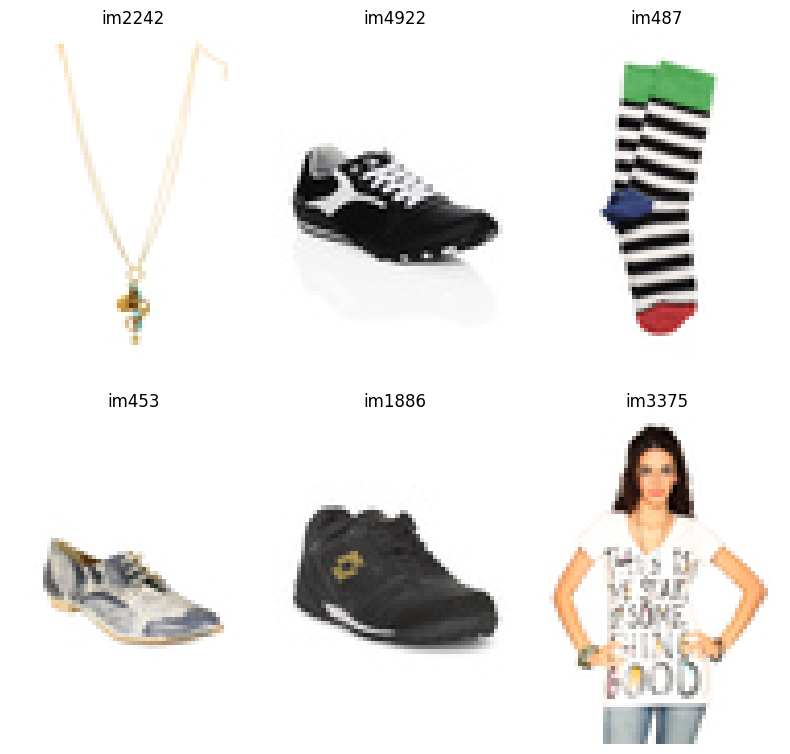

In [38]:
import matplotlib.pyplot as plt
import numpy as np

# generation of a dictionary of (title, images)
figures = {'im'+str(i): load_image(row.image) for i, row in df.sample(6).iterrows()}
# plot of the images in a figure, with 2 rows and 3 columns
plot_figures(figures, 2, 3)

<Axes: >

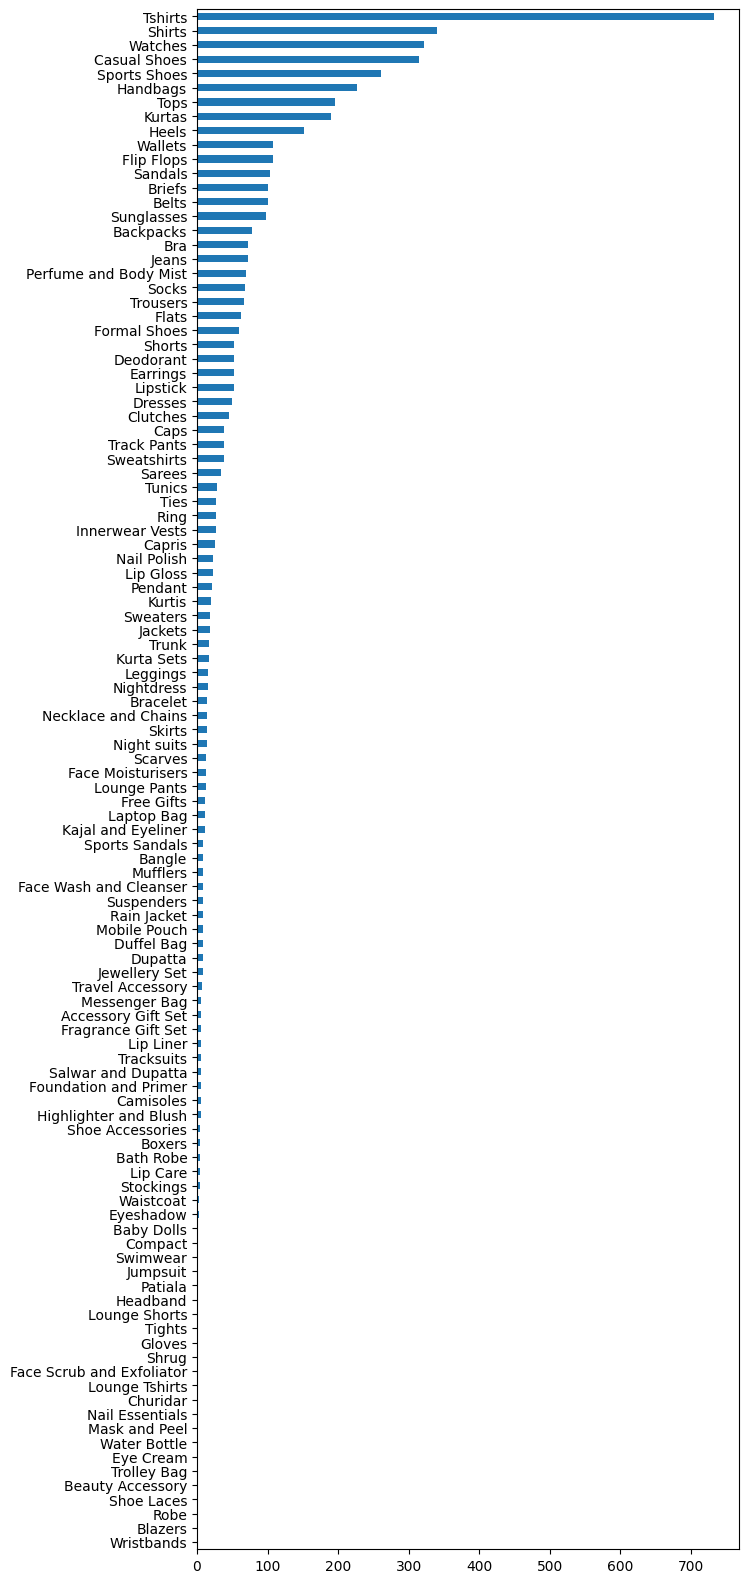

In [39]:
plt.figure(figsize=(7,20))
df.articleType.value_counts().sort_values().plot(kind='barh')

In [40]:
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.layers import GlobalMaxPooling2D,GlobalAveragePooling2D
from tensorflow.keras.layers import Dropout,Dense
tf.__version__

'2.12.0'

In [41]:
# Input Shape
img_width, img_height, _ = load_image(df.iloc[0].image).shape



In [42]:
# Pre-Trained Model
# /*base_model = ResNet50(weights='imagenet', 
#                       include_top=False, 
#                       input_shape = (img_width, img_height, 3))
# base_model.trainable = False

# # Add Layer Embedding
# model = tf.keras.Sequential([
#     base_model,
#     GlobalMaxPooling2D()
# ])

# model.summary()

In [43]:
base_model = ResNet50(weights= None, include_top=False, input_shape= (img_height,img_width,3))
base_model.trainable = False

In [44]:
model = tf.keras.Sequential([
     base_model,
     GlobalMaxPooling2D()
 ])

In [45]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2, 3, 2048)        23587712  
                                                                 
 global_max_pooling2d (Globa  (None, 2048)             0         
 lMaxPooling2D)                                                  
                                                                 
Total params: 23,587,712
Trainable params: 0
Non-trainable params: 23,587,712
_________________________________________________________________


In [46]:
# x = base_model.output
# y = GlobalAveragePooling2D()(x)
# z = Dropout(0.7)(y)
# predictions = Dense(num_classes, activation= 'softmax')(z)
# model = Model(inputs = base_model.input, outputs = predictions)

In [47]:
def get_embedding(model, img_name):
    # Reshape
    img = image.load_img(img_path(img_name), target_size=(img_height,img_width))
    # img to Array
    x   = image.img_to_array(img)
    # Expand Dim (1, w, h)
    x   = np.expand_dims(x, axis=0)
    # Pre process Input
    x   = preprocess_input(x)
    return model.predict(x).reshape(-1)

In [48]:
emb = get_embedding(model, df.iloc[1].image)
emb.shape

1/1 [==============================] - 2s 2s/step


(2048,)

[ 2.6798227 12.330057   8.842634  ...  6.818489   4.6863155  5.371869 ]


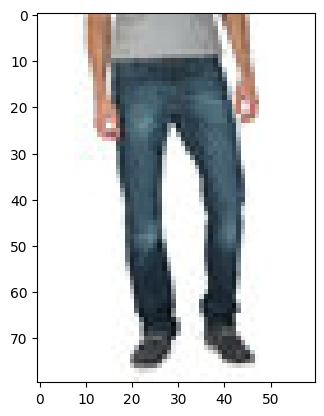

In [49]:
plt.imshow(cv2.cvtColor(load_image(df.iloc[1].image), cv2.COLOR_BGR2RGB))
print(emb)

In [50]:
! pip install swifter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 830.9/830.9 kB 11.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 47.0 MB/s eta 0:00:00
  Created wheel for swifter: filename=swifter-1.3.4-py3-none-any.whl size=16299 sha256=f4cc48d19f3103a8d18c8426f1ba07937a9a08ae99c29b2a267ba380e10d4ed2
  Stored in directory: /root/.cache/pip/wheels/6c/bd/3e/2d6afc9bc36c9975f8e4215a270bbac6580c4361ebd6bb2323
Successfully built swifter


In [51]:
%%time
import swifter

# Parallel apply
map_embeddings = df['image'].swifter.apply(lambda img: get_embedding(model, img))
df_embs        = map_embeddings.apply(pd.Series)

print(df_embs.shape)
df_embs.head()

Pandas Apply:   0%|          | 0/5000 [00:00<?, ?it/s]

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 85ms/step
(5000, 2048)
CPU times: user 14min 18s, sys: 20.8 s, total: 14min 39s
Wall time: 15min 28s


,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,2.598446,12.572812,8.220854,2.128797,2.527764,11.926306,4.317932,4.280088,10.595946,3.465869,...,2.736137,1.285876,2.604542,7.435220,7.220285,0.987609,22.764883,8.131614,6.720405,6.246735
1,2.679823,12.330057,8.842634,1.661264,2.344917,12.808915,4.163052,4.089796,10.181654,3.399745,...,2.668337,0.288900,5.439049,9.154796,5.435044,1.083089,19.138283,6.818489,4.686316,5.371869
2,3.326985,13.346151,9.093426,2.003912,2.852260,11.431647,5.375785,4.987381,9.793763,4.179224,...,2.925151,2.023505,5.317707,6.063769,7.116024,1.142625,17.988981,8.284422,6.655545,5.774492
3,2.404424,13.040945,7.609902,1.106897,2.458269,11.135666,6.967383,4.054945,14.862751,6.867663,...,2.717808,0.818671,4.475530,7.364766,7.434880,0.931053,21.784876,8.283832,6.235874,5.951684
4,3.519396,10.587408,8.865764,2.040068,2.878190,11.294589,5.256824,6.101279,13.635751,9.809700,...,3.113426,1.370392,4.643617,5.074426,8.415011,0.984391,21.383049,9.034810,7.183393,6.541193


In [52]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise_distances.html
from sklearn.metrics.pairwise import pairwise_distances

# Calcule DIstance Matriz
cosine_sim = 1-pairwise_distances(df_embs, metric='cosine')
cosine_sim[:4, :4]

array([[1.        , 0.97521675, 0.98391104, 0.97642446],
       [0.97521675, 1.        , 0.9778931 , 0.9846461 ],
       [0.98391104, 0.9778931 , 0.99999934, 0.97835773],
       [0.97642446, 0.9846461 , 0.97835773, 0.99999934]], dtype=float32)

In [53]:
indices = pd.Series(range(len(df)), index=df.index)
indices

# Function that get movie recommendations based on the cosine similarity score of movie genres
def get_recommender(idx, df, top_n = 5):
    sim_idx    = indices[idx]
    sim_scores = list(enumerate(cosine_sim[sim_idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n+1]
    idx_rec    = [i[0] for i in sim_scores]
    idx_sim    = [i[1] for i in sim_scores]
    
    return indices.iloc[idx_rec].index, idx_sim

get_recommender(2993, df, top_n = 5)

(Int64Index([2779, 1127, 832, 4853, 3482], dtype='int64'),
 [0.9966748, 0.99664783, 0.9961295, 0.9961228, 0.9960327])

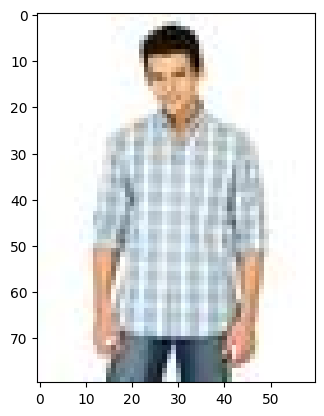

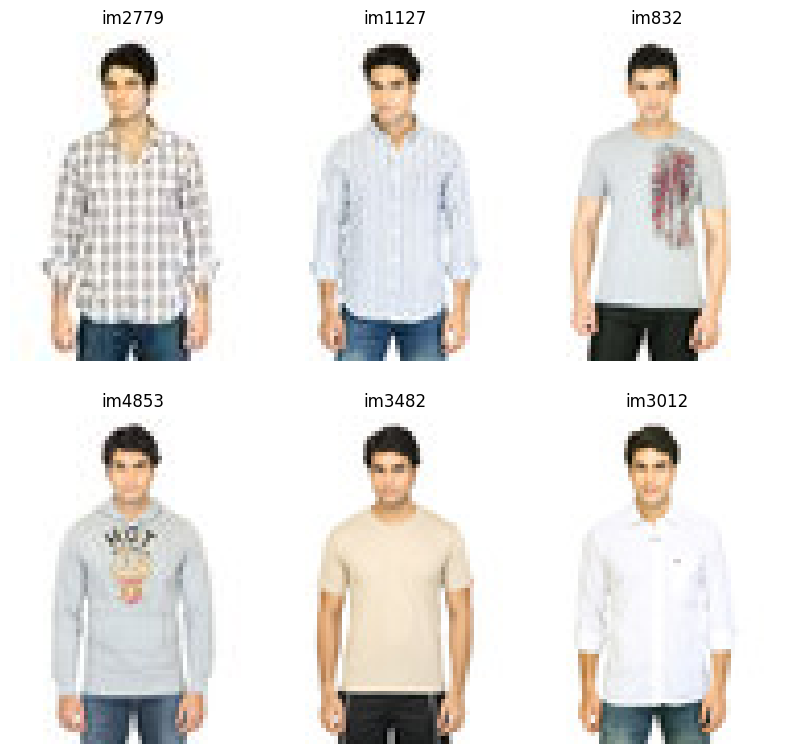

In [54]:
# Idx Item to Recommender
idx_ref = 2993

# Recommendations
idx_rec, idx_sim = get_recommender(idx_ref, df, top_n = 6)

# Plot
#===================
plt.imshow(cv2.cvtColor(load_image(df.iloc[idx_ref].image), cv2.COLOR_BGR2RGB))

# generation of a dictionary of (title, images)
figures = {'im'+str(i): load_image(row.image) for i, row in df.loc[idx_rec].iterrows()}
# plot of the images in a figure, with 2 rows and 3 columns
plot_figures(figures, 2, 3)

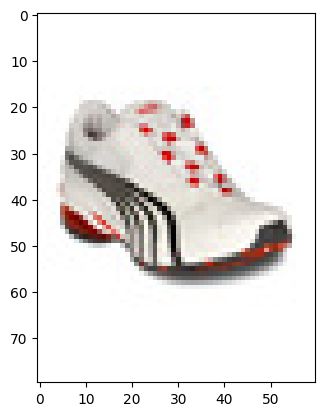

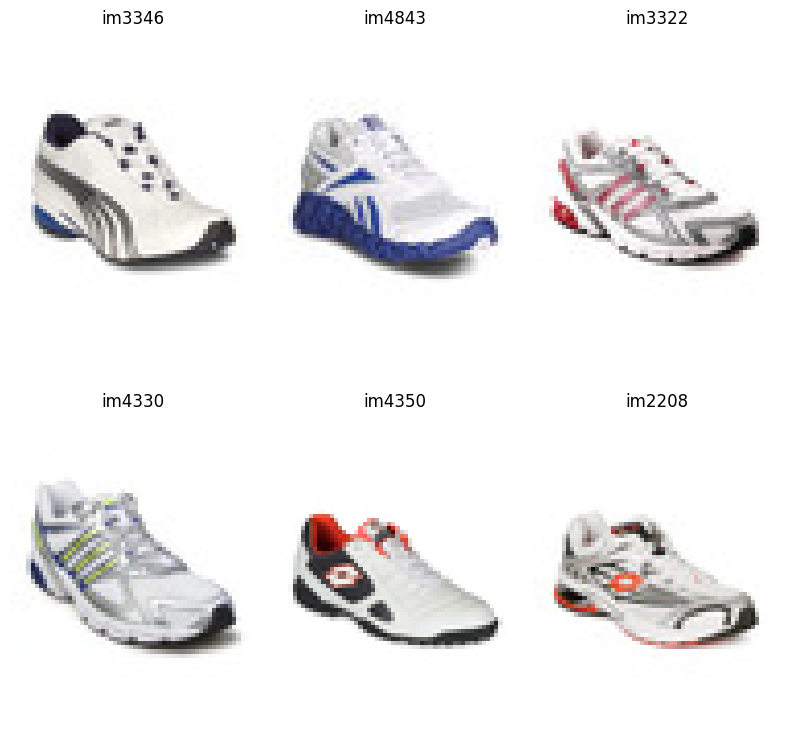

In [55]:
idx_ref = 987

# Recommendations
idx_rec, idx_sim = get_recommender(idx_ref, df, top_n = 6)

# Plot
#===================
plt.imshow(cv2.cvtColor(load_image(df.iloc[idx_ref].image), cv2.COLOR_BGR2RGB))

# generation of a dictionary of (title, images)
figures = {'im'+str(i): load_image(row.image) for i, row in df.loc[idx_rec].iterrows()}
# plot of the images in a figure, with 2 rows and 3 columns
plot_figures(figures, 2, 3)

In [56]:
from sklearn.manifold import TSNE
import time
import seaborn as sns

In [57]:
df.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,image
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011,Casual,Turtle Check Men Navy Blue Shirt,15970.jpg
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012,Casual,Peter England Men Party Blue Jeans,39386.jpg
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016,Casual,Titan Women Silver Watch,59263.jpg
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011,Casual,Manchester United Men Solid Black Track Pants,21379.jpg
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012,Casual,Puma Men Grey T-shirt,53759.jpg


In [58]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(df_embs)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 40.89837598800659 seconds


In [ ]:
df['tsne-2d-one'] = tsne_results[:,0]
df['tsne-2d-two'] = tsne_results[:,1]

In [ ]:
plt.figure(figsize=(16,10))
sns.scatterplot(x="tsne-2d-one", y="tsne-2d-two",
                hue="masterCategory",
                data=df,
                legend="full",
                alpha=0.8)

In [ ]:
df.sample(100).to_csv('df_sample.csv')
df_embs.to_csv('embeddings.csv')
df.to_csv('metadados.csv')

In [ ]:
! pip install flask-ngrok

In [ ]:
! pip install pyngrok

In [ ]:
! ngrok authtoken 2PhU7XwghmKZOLuUcpTgCKFO436_2wDa47XfC2oxgNi11auKT

In [ ]:
! pip install flask --quiet
! pip install flask-ngrok --quiet
print("Completed!")

In [66]:
! wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.tgz

--2023-05-23 07:33:38--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.tgz
Resolving bin.equinox.io (bin.equinox.io)... 18.205.222.128, 54.237.133.81, 52.202.168.65, ...
Connecting to bin.equinox.io (bin.equinox.io)|18.205.222.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13856790 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.tgz’

ngrok-stable-linux- 100%[===================>]  13.21M  57.1MB/s    in 0.2s    

2023-05-23 07:33:38 (57.1 MB/s) - ‘ngrok-stable-linux-amd64.tgz’ saved [13856790/13856790]



In [ ]:
! tar -xvf /content/ngrok-stable-linux-amd64.tgz

In [ ]:
!./ngrok authtoken 2QBN6SQIR7ya6QfLjyVBGtNtwvz_7DUCy9XuvazxzGUW8VJCB

In [69]:
from google.colab import drive
drive.mount('/content/drive')

KeyboardInterrupt: ignored

In [70]:
cd /content/drive/My Drive/Project

[Errno 2] No such file or directory: '/content/drive/My Drive/Project'
/content


In [71]:
! pip install flask_ngrok 


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [72]:
# import Flask from flask module
from flask import Flask
import requests

# import run_with_ngrok from flask_ngrok to run the app using ngrok
from flask_ngrok import run_with_ngrok
  
app = Flask(__name__) #app name
run_with_ngrok(app)
  
@app.route("/")
def hello():
    return "<h1>Hello world</h1>"
  
if __name__ == "__main__":
    app.run()

 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit


 * Running on http://b5f2-34-75-137-66.ngrok-free.app
 * Traffic stats available on http://127.0.0.1:4040


INFO:werkzeug:127.0.0.1 - - [23/May/2023 07:59:48] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/May/2023 07:59:49] "GET /favicon.ico HTTP/1.1" 404 -
